In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import numpy as np
%matplotlib inline

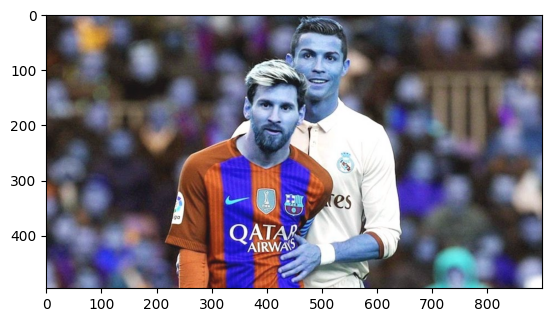

In [2]:
img = cv2.imread("test_images/messi-CR.jpg")
plt.imshow(img)

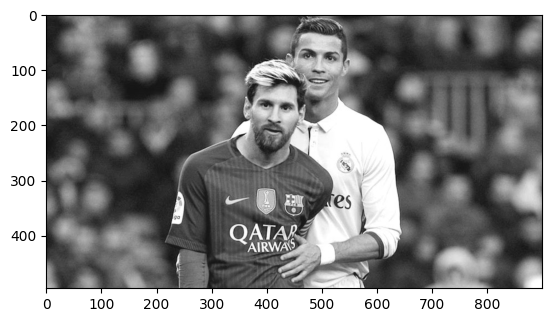

In [3]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

In [4]:
face_cascade = cv2.CascadeClassifier("haarcascades/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("haarcascades/haarcascade_eye.xml")

faces = face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[376, 315,  47,  47],
       [ 49,  17,  53,  53],
       [365, 129, 101, 101],
       [444,  38, 102, 102]])

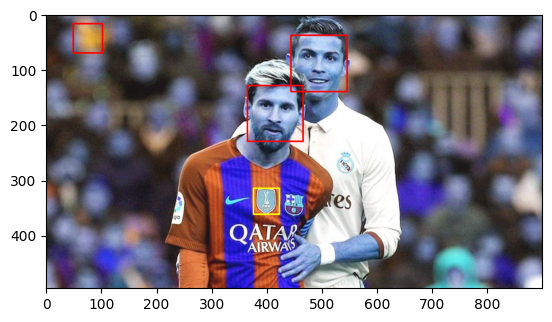

In [12]:
(x,y,w,h) = faces[0]
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

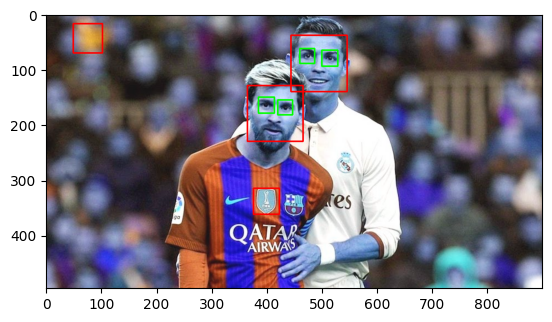

In [14]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y), (x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h,x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.figure()
plt.imshow(face_img, cmap='gray')


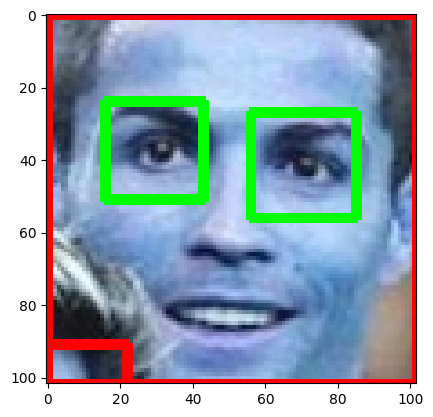

In [34]:
plt.imshow(roi_color)

In [47]:
def get_cropped_images_if_two_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,1.3,5)
    selected_faces = []
    for(x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes)==2:
            selected_faces.append(roi_color)
    return selected_faces

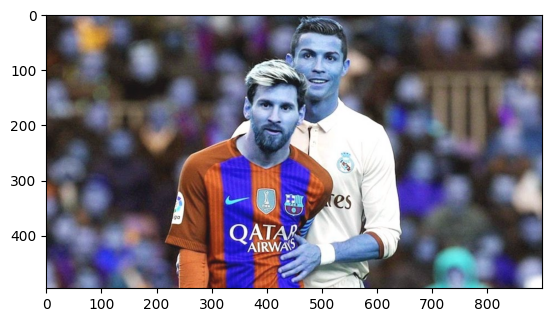

In [41]:
test_img = cv2.imread("test_images/messi-CR.jpg")
plt.imshow(test_img)

2


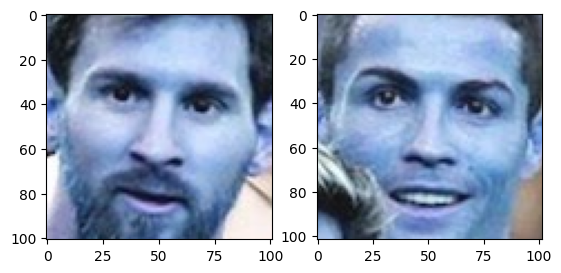

In [58]:
faces = get_cropped_images_if_two_eyes("test_images/messi-CR.jpg")
print(len(faces))
fig, ax = plt.subplots(1,len(faces),)
for ax,face in zip(ax,faces):
    ax.imshow(face)
plt.show()


In [59]:
path2data = "./images"
path2crdata = "./images/cropped"

In [62]:
import os
img_dirs = []
for entry in os.scandir(path2data):
    if entry.is_dir():
        img_dirs.append(entry.path)
img_dirs

['./images\\lionel_messi',
 './images\\roger_federer',
 './images\\ronaldo',
 './images\\virat_kohli']

In [67]:
import shutil
if os.path.exists(path2crdata):
    shutil.rmtree(path2crdata)
os.mkdir(path2crdata)

In [68]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count=1
    name = img_dir.split('\\')[-1]
    print(name)
    
    celebrity_file_names_dict[name] = []
    cropped_folder = path2crdata +"/"+ name
    
    for entry in os.scandir(img_dir):
        faces = get_cropped_images_if_two_eyes(entry.path)
        for face in faces:
            if not os.path.exists(cropped_folder):
                os.mkdir(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            file_name = name+str(count)+".png"
            file_path = cropped_folder +"/"+ file_name
            cv2.imwrite(file_path, face)
            celebrity_file_names_dict[name].append(file_path)
            count += 1    

lionel_messi
Generating cropped images in folder:  ./images/cropped/lionel_messi
roger_federer
Generating cropped images in folder:  ./images/cropped/roger_federer
ronaldo
Generating cropped images in folder:  ./images/cropped/ronaldo
virat_kohli
Generating cropped images in folder:  ./images/cropped/virat_kohli
